<h3 style='color:purple' align='center'>Bank Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#lets drop 	customerID,RowNumber & Surname  as it have no use
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.shape

(10000, 11)

In [23]:
df['Tenure'].isn().sum()

0

<Axes: >

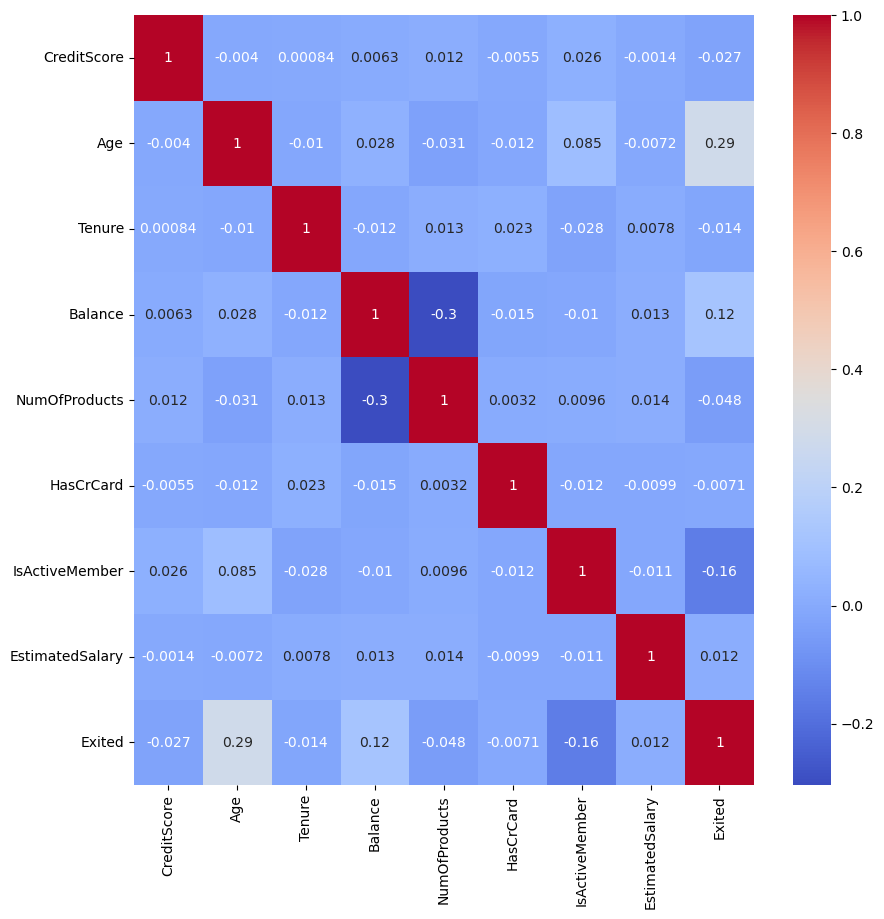

In [27]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

In [44]:
df.Gender = df.Gender.map({'Female': 0, 'Male':1})
df = pd.get_dummies(data=df, columns=['Geography'])
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4844,670,0,36,2,84266.44,2,0,0,38614.69,0,0,1,0
1069,844,1,40,7,113348.14,1,1,0,31904.31,1,1,0,0
7844,612,0,38,1,0.00,2,1,1,9209.21,0,1,0,0
9714,726,0,56,2,105473.74,1,1,1,46044.70,0,0,0,1
2013,705,1,35,4,136496.12,2,1,0,116672.02,0,0,1,0


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

col_to_scale=['CreditScore', 'Age', 'Tenure','Balance', 'NumOfProducts', 'EstimatedSalary']
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [46]:
from sklearn.metrics import classification_report, confusion_matrix


def ann(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(12, ), activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])


    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, class_weight=weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test ,y_preds))

    print("\nConfusion Matrix: \n", confusion_matrix(y_test ,y_preds))

    return y_preds

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis='columns')
y = df.Exited

df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [48]:
import tensorflow as tf
from tensorflow import keras

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, stratify=y)
y_pred1 = ann(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
235/235 [==============================] - 2s 3ms/step - loss: 0.5166 - accuracy: 0.7855
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8027
Epoch 3/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.8088
Epoch 4/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4259 - accuracy: 0.8164
Epoch 5/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8191
Epoch 6/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4053 - accuracy: 0.8257
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8321
Epoch 8/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3808 - accuracy: 0.8357
Epoch 9/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8413
Epoch 10/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3638 - accura

235/235 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8649
Epoch 82/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8633
Epoch 83/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8657
Epoch 84/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3256 - accuracy: 0.8661
Epoch 85/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3260 - accuracy: 0.8655
Epoch 86/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8621
Epoch 87/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8648
Epoch 88/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8649
Epoch 89/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8649
Epoch 90/100
235/235 [==============================] - 1s 2ms/step - loss: 0.3230 - accuracy: 